# Misc Stuff

In [1]:
!wget https://lh3.googleusercontent.com/a-/AAuE7mBJ6cX9jNcuMKAkI46NvT4KfYrkPRxzk_lVweKP=s640-rw-il -O test.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
def to_rgb(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
!wget https://cdn.skillenza.com/files/5ee0a2e1-bf6d-4173-8244-e75fa2d7bbe2/training.5k.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!unzip training.5k.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
!wget https://docs.opencv.org/3.3.1/erosion.png

'wget' is not recognized as an internal or external command,
operable program or batch file.


# Reading, displaying and writing an image

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Reading Images

In [7]:
image = cv2.imread('dolores.jpeg')

In [8]:
type(image)

numpy.ndarray

In [9]:
image.shape

(674, 673, 3)

## Displaying Images

### Using matplotlib

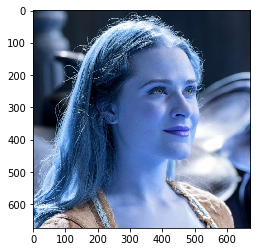

In [10]:
plt.imshow(image)

By default, OpenCV loads the images in the order **BGR**, instead of more conventional **RGB**. You can convert an image to a suitable format using `cv2.cvtColor(image, FLAG)` function

In [11]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

Investigate other conversion options in the official documentation.

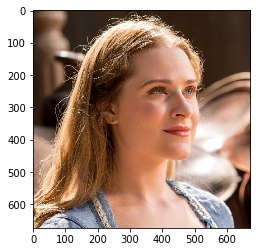

In [12]:
plt.imshow(image_rgb)

### Using OpenCV

Following won't work on Colab. You will have to run it on your PC.

In [13]:
# cv2.imshow("Image", image)
# cv2.waitKey(0)

You can also customize the window properties

In [14]:
# window = cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
# cv2.imshow(window, image)
# cv2.waitKey(0)

## Saving Images

Let's do a small manipulation on the image before saving it. We'll only convert it to grayscale for now.

In [15]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [16]:
cv2. imwrite('dolores_gray.png', image_gray)

True

In [17]:
image_gray.shape

(674, 673)

In [18]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


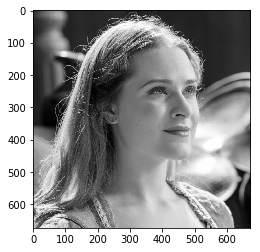

In [19]:
image_gray1 = cv2.imread('dolores_gray.png')
plt.imshow(image_gray1)

# Drawing

## Lines

In [20]:
canvas = np.full((300, 300, 3), fill_value=255, dtype = "uint8")  # Setting dtype to uint8 is required

In [21]:
_=cv2.line(img=canvas, pt1=(0, 50), pt2=(300, 300), color=(0, 0, 255), thickness=5, lineType=cv2.LINE_AA)

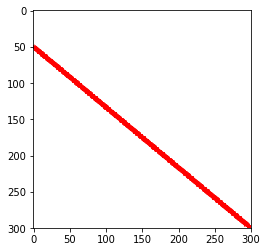

In [22]:
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

## Rectangles

In [23]:
_=cv2.rectangle(img=canvas, pt1=(0, 200), pt2=(100, 300), color=(0, 255, 0), thickness=5, lineType=cv2.LINE_AA)

In [24]:
_=cv2.rectangle(img=canvas, pt1=(200, 0), pt2=(300, 100), color=(0, 255, 0), thickness=-1, lineType=cv2.LINE_AA)

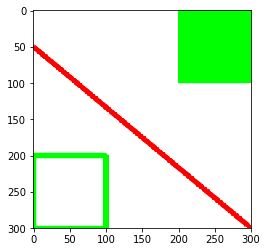

In [25]:
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

## Circles

In [26]:
_=cv2.circle(img=canvas, center=(150, 150), radius=50, color=(255, 0, 0), thickness=-1, lineType=cv2.LINE_AA)

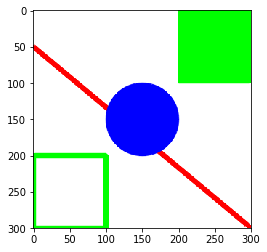

In [27]:
plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGR2RGB))

# Key Operations

## Resizing
 Doesn't maintain aspect ratio

In [28]:
image_resized = cv2.resize(image, (200, 200))

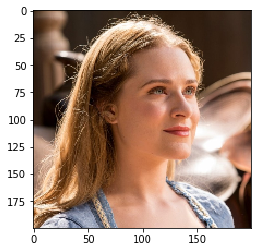

In [29]:
plt.imshow(cv2.cvtColor(image_resized, cv2.COLOR_BGR2RGB))

## Blurring

### Average Blurring

In [30]:
image_avg_blur = cv2.blur(image, (51, 51))

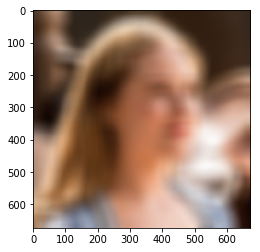

In [31]:
plt.imshow(to_rgb(image_avg_blur))

### Gaussian Blurring

In [32]:
image_gauss_blur = cv2.GaussianBlur(image, (51, 51), 5)

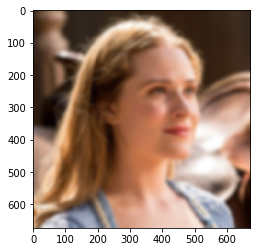

In [33]:
plt.imshow(to_rgb(image_gauss_blur))

### Further Reading
- Median Blur: Useful for salt and pepper noise
- Bilateral Blur: Useful for maintaing edges

## Canny Edge Detection
The values between threshold1 and threshold2 are examined to see if they are actually edges. It is done using non-maximum suppression.

Steps:
- Apply Gaussian filter to smooth the image in order to remove the noise
- Find the intensity gradients of the image (By applying a small convolution filter that gives you gradient direction. e.g., Sobel)
- Apply non-maximum suppression to get rid of spurious response to edge detection (See if there are any continuing pixels in the direction of pixel's gradient)
- Apply double threshold to determine potential edges
- Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

In [34]:
image_gray_smooth = cv2.GaussianBlur(image_gray, (3, 3), 0)

In [35]:
canny = cv2.Canny(image_gray_smooth, threshold1=80, threshold2=80)

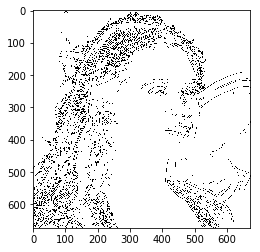

In [36]:
plt.imshow(canny, cmap='Greys')

## Morphological Operations

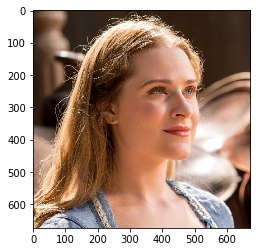

In [37]:
img = cv2.imread('dolores.jpeg')
plt.imshow(to_rgb(img))

### Erosion

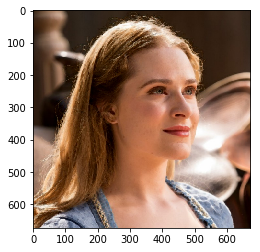

In [38]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
plt.imshow(to_rgb(erosion))

### Dilation

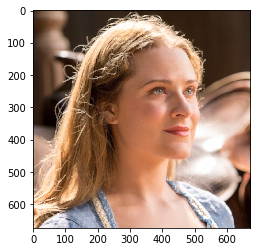

In [39]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.imshow(to_rgb(dilation))

### Opening
This is erosion followed by dilation. This way, it  removes the noise while stil preserving the edge widths

In [40]:
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

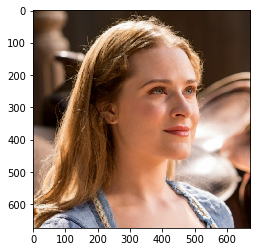

In [41]:
plt.imshow(to_rgb(opening))

# Image Manipulation
## Homework-
**Build your own data augmentation framework.**

Provided a set of images, and a list of transformations, the user should get back augmented images, with those transforamtions applied.
- List of Transformations that can be applied:
  * Random Translation (Take as input max.no. of pixels to translate by)
  * Random Rotation (Take as input max.no. of degrees to rotate by)
  * Random Cropping
  * Flipping
  * Random Zooming (Take as input the max. zooming factor): Note that it is different than cropping in the sense that you need to keep the output image size same as the original one.
 

In [42]:
rows,cols = image_gray.shape
T = np.float32(([1,0,50],[0,1,50]))
image_translate = cv2.warpAffine(image_gray,T,(cols,rows))
cv2.imshow('image_gray',image_translate)
cv2.waitKey(0)

-1

In [43]:
R = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
image_rot = cv2.warpAffine(image_gray,R,(cols,rows))
cv2.imshow('image_gray',image_rot)
cv2.waitKey(0)

-1

In [44]:
image_crop = image_gray[:200,:200]
cv2.imshow('image_crop',image_crop)
cv2.waitKey(0)

-1

In [45]:
image_flip = np.flip(image_gray,axis = 1)
cv2.imshow('image_flip',image_flip)
cv2.waitKey(0)

-1

In [46]:
image_crop.shape
cols

673

In [55]:
image_zoom = cv2.resize(image_crop,(cols,rows))
image_zoom.shape
cv2.imshow('image_zoom',image_zoom)
cv2.waitKey(0)

-1